In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt


In [2]:
##List the parameters given in the design problem
N,fc,fs=map(int,input().split())        #Filter order,  #Cutoff frequency ,  #Sampling frequency
cutoff=fc/(fs/2)       #Calculate Normalized digital cutoff requency w.r.t. Nyquist rate

35 5000 20000


In [3]:
##Determine Filter coefficients using signal.firwin
b_rect = signal.firwin(N,cutoff,window="boxcar")              #Call filter design function using Rectangular window 
b_ham = signal.firwin(N,cutoff,window="hamming")             #Call filter design function using Hamming window

In [4]:
##Determine Frequency response of the filters using signal.freqz
w,h_rect =signal.freqz(b_rect,a=1)      #Calculate response h at specified frequency points w for Rectangular window
w,h_ham =signal.freqz(b_ham,a=1)        #Calculate response h at specified frequency points w for Haming window

In [5]:
##Compute Magnitude Response of the filters
h_dB_rect =20*np.log10(abs(h_rect))           #Calculate magnitude in decibels for Rectangular window
h_dB_ham =20*np.log10(abs(h_ham))             #Calculate magnitude in decibels for Haming window

In [6]:
##Compute phase response of the filters
h_Phase_rect =np.unwrap(np.arctan2(np.imag(h_rect),np.real(h_rect)))     #Calculate phase of Rectangular window
h_Phase_ham = np.unwrap(np.arctan2(np.imag(h_ham),np.real(h_ham)))        #Calculate phase of Haming window

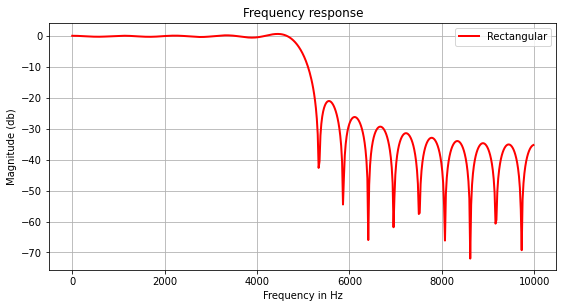

In [12]:
##Plot filter magnitude and phase responses using subplot. 
fig = plt.figure(figsize=(20, 10))
##Magnitude response of Rectangular Window
sub1 = plt.subplot(2, 2, 1)
sub1.plot(w*fs/(2*np.pi),h_dB_rect,'r', label='Rectangular', linewidth='2')           #Digital frequency w converted in analog frequency 
sub1.set_ylabel('Magnitude (db)')
sub1.set_xlabel('Frequency in Hz')
sub1.set_title('Frequency response')
sub1.legend()
sub1.axis=([0,  fs/2,  -80,  5])
sub1.grid()


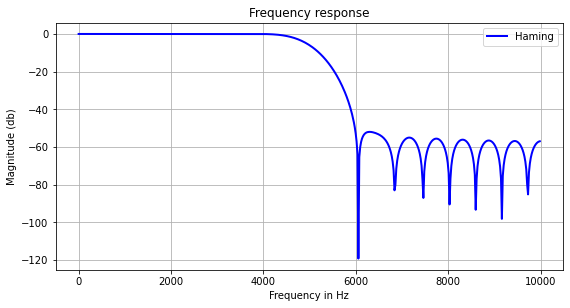

In [14]:
fig = plt.figure(figsize=(20, 10))
sub2 = plt.subplot(2, 2, 2)
sub2.plot(w*fs/(2*np.pi),h_dB_ham,'b', label='Haming', linewidth='2')                 #Digital frequency w converted in analog frequency
sub2.set_ylabel('Magnitude (db)')
sub2.set_xlabel('Frequency in Hz')
sub2.set_title('Frequency response')
sub2.legend()
sub2.axis=([0,  fs/2,  -80,  5])
sub2.grid()

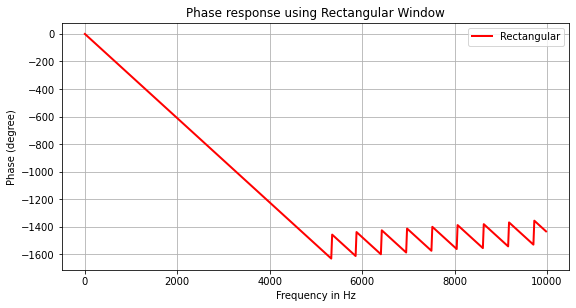

In [15]:
fig = plt.figure(figsize=(20, 10))
sub3 = plt.subplot(2, 2, 3)
sub3.plot(w*fs/(2*np.pi),h_Phase_rect*180/np.pi, 'r', label='Rectangular', linewidth='2')      #Digital frequency w converted in analog frequency and phase in degree
sub3.set_ylabel('Phase (degree)')
sub3.set_xlabel('Frequency in Hz')
sub3.set_title('Phase response using Rectangular Window')
sub3.legend()
sub3.grid()


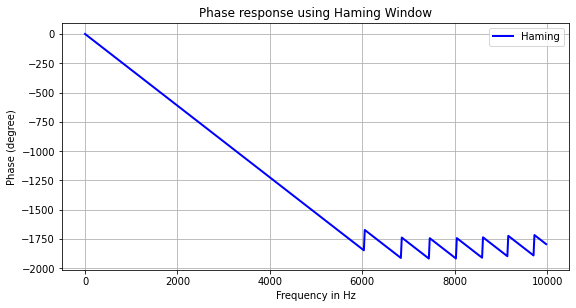

In [16]:
fig = plt.figure(figsize=(20, 10))
sub4 = plt.subplot(2, 2, 4)
sub4.plot(w*fs/(2*np.pi),h_Phase_ham*180/np.pi, 'b', label='Haming', linewidth='2')   #Digital frequency w converted in analog frequency and phase in degree
sub4.set_ylabel('Phase (degree)')
sub4.set_xlabel('Frequency in Hz')
sub4.set_title('Phase response using Haming Window')
sub4.legend()
sub4.grid()

Coefficients of Rectangular Window:
b_[0]=b_[34]= 0.018399721737117073
b_[1]=b_[33]= -1.9153186280978044e-17
b_[2]=b_[32]= -0.02085301796873269
b_[3]=b_[31]= 1.9153186280978044e-17
b_[4]=b_[30]= 0.024061174579306944
b_[5]=b_[29]= -1.9153186280978044e-17
b_[6]=b_[28]= -0.028435933593726394
b_[7]=b_[27]= 1.9153186280978047e-17
b_[8]=b_[26]= 0.03475502994788781
b_[9]=b_[25]= -1.9153186280978044e-17
b_[10]=b_[24]= -0.044685038504427184
b_[11]=b_[23]= 1.9153186280978044e-17
b_[12]=b_[22]= 0.06255905390619805
b_[13]=b_[21]= -1.9153186280978044e-17
b_[14]=b_[20]= -0.10426508984366344
b_[15]=b_[19]= 1.9153186280978044e-17
b_[16]=b_[18]= 0.3127952695309903
b_[17]= 0.4913376604180992

Plot of the the filter coefficients:


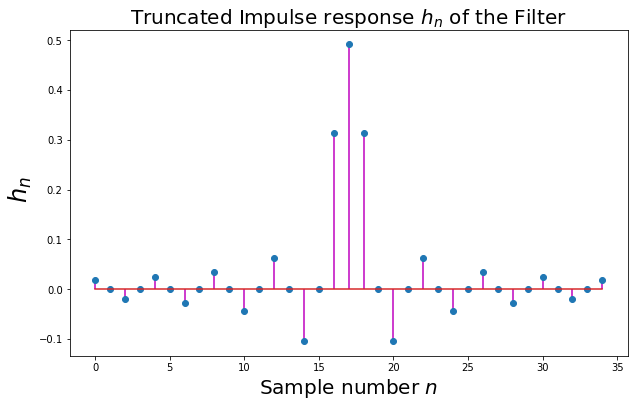

In [17]:
##Test the coefficients for symmetric or anti-symmetric and its plot
print('Coefficients of Rectangular Window:')
M=int((N-1)/2)
for n in range(M):
  if (b_rect[n]==b_rect[N-1-n]):
    print(r"b_[{}]=b_[{}]=".format(n, N-1-n), b_rect[n], end='\n' )
  else:
    print('Anti-Symmetric filter')

print(r"b_[{}]=".format(M), b_rect[M], end='\n' )    
print(sep='\n')

print('Plot of the the filter coefficients:')  
fig = plt.figure(figsize=(10, 6))
plt.stem(np.arange(0, len(b_rect)),b_rect, 'm', use_line_collection='True')
plt.xlabel("Sample number $n$",fontsize=20)
plt.ylabel(" $h_n$",fontsize=24)
plt.title('Truncated Impulse response $h_n$ of the Filter', fontsize=20)
plt.show()